In [73]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

#reference : https://medium.com/iet-vit/lets-build-a-rnn-pytorch-style-c960207f1fb3
#learn how to use RNN

In [74]:
seq_length = 20
time_steps = np.linspace(0, np.pi, seq_length + 1)
data = np.sin(time_steps)
print(data.shape)
data.resize((seq_length + 1, 1)) # equal to tensor.view
print(data.shape)
#size becomes (seq_length+1, 1), adds an input_size dimension

(21,)
(21, 1)


In [75]:
x = data[:-1] # all but the last piece of data
y = data[1:] # all but the first

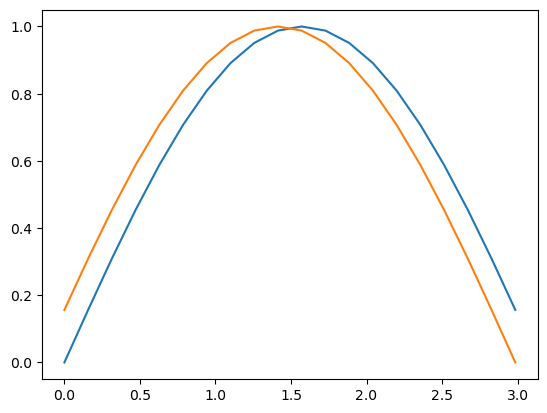

In [76]:
"""
假设数据是一个sequence的数据。
x = t时刻的值 = f(t)
y = t + 1时刻的值 = f(t+1)

通过对t时刻的值进行训练。 预测在t+1时刻。 f(t+1)'
"""
x_index = time_steps[:-1]
y_index = time_steps[1:]
plt.plot(x_index, x)
plt.plot(x_index, y)

In [77]:
class RNN(nn.Module):
    def __init__(self, input_size, output_size, hidden_dim, n_layers):
        super(RNN, self).__init__()

        self.hidden_dim=hidden_dim
        # batch_first means that the first dim of the input and output will be the batch_size
        self.rnn = nn.RNN(input_size, hidden_dim, n_layers, batch_first=True)
        # last, fully-connected layer
        self.fc = nn.Linear(hidden_dim, output_size)

    def forward(self, x, hidden):
        # x (batch_size, seq_length, input_size)
        # hidden (n_layers, batch_size, hidden_dim)
        # r_out (batch_size, time_step, hidden_size)
        batch_size = x.size(0)

        # get RNN outputs
        r_out, hidden = self.rnn(x, hidden)
        # shape output to be (batch_size*seq_length, hidden_dim)
        r_out = r_out.view(-1, self.hidden_dim)

        # get final output
        output = self.fc(r_out)

        return output, hidden

In [78]:
input_size=1
output_size=1
hidden_dim=32
n_layers=1

rnn = RNN(input_size, output_size, hidden_dim, n_layers)
print(rnn)

RNN(
  (rnn): RNN(1, 32, batch_first=True)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)


In [79]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(rnn.parameters(), lr=0.01)

before x=(20, 1)
after x=(20, 1)
Parameter containing:
tensor([[ 0.0742, -0.0584,  0.0546, -0.0018,  0.0641, -0.1510,  0.0530, -0.0702,
          0.0624,  0.1510, -0.0578,  0.0499,  0.0703,  0.0426, -0.1481, -0.1108,
          0.0141, -0.0083,  0.0350,  0.0726,  0.0314, -0.0650,  0.1050,  0.1608,
         -0.0226,  0.0449, -0.0608,  0.1728, -0.0606,  0.1759, -0.0430, -0.0073]],
       requires_grad=True)
Parameter containing:
tensor([-0.0743], requires_grad=True)
before x=(20, 1)
after x=(20, 1)
Parameter containing:
tensor([[ 0.0842, -0.0684,  0.0646,  0.0082,  0.0741, -0.1410,  0.0430, -0.0602,
          0.0524,  0.1610, -0.0478,  0.0399,  0.0603,  0.0526, -0.1381, -0.1008,
          0.0041,  0.0017,  0.0250,  0.0626,  0.0214, -0.0750,  0.1150,  0.1708,
         -0.0126,  0.0349, -0.0508,  0.1628, -0.0706,  0.1659, -0.0530,  0.0027]],
       requires_grad=True)
Parameter containing:
tensor([-0.0843], requires_grad=True)
before x=(20, 1)
after x=(20, 1)
Parameter containing:
tensor([[

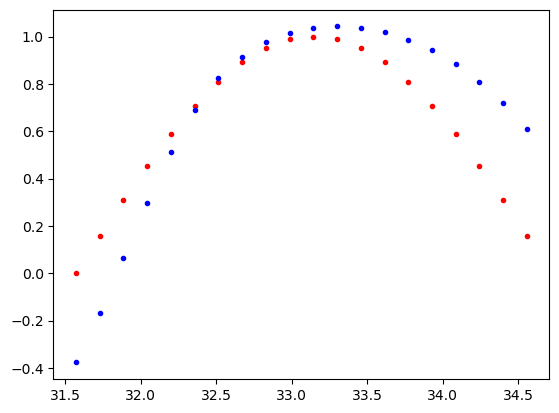

before x=(20, 1)
after x=(20, 1)
Parameter containing:
tensor([[ 0.0875, -0.0908,  0.0692,  0.0796,  0.1488, -0.1989, -0.0236, -0.0741,
          0.0203,  0.2027, -0.0021, -0.0020,  0.0670,  0.0747, -0.2030, -0.0267,
         -0.0136,  0.0070, -0.0381,  0.0334, -0.0186, -0.0729,  0.1861,  0.2281,
         -0.0171,  0.0410, -0.0325,  0.1286, -0.0242,  0.1266, -0.0833,  0.0020]],
       requires_grad=True)
Parameter containing:
tensor([-0.0770], requires_grad=True)
before x=(20, 1)
after x=(20, 1)
Parameter containing:
tensor([[ 0.0873, -0.0920,  0.0692,  0.0826,  0.1509, -0.2013, -0.0277, -0.0759,
          0.0192,  0.2049,  0.0018, -0.0067,  0.0674,  0.0757, -0.2057, -0.0219,
         -0.0158,  0.0051, -0.0408,  0.0310, -0.0218, -0.0738,  0.1881,  0.2298,
         -0.0179,  0.0403, -0.0306,  0.1251, -0.0211,  0.1227, -0.0855,  0.0007]],
       requires_grad=True)
Parameter containing:
tensor([-0.0768], requires_grad=True)
before x=(20, 1)
after x=(20, 1)
Parameter containing:
tensor([[

RNN(
  (rnn): RNN(1, 32, batch_first=True)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)

In [80]:
def train(rnn, n_steps, print_every):

    # initialize the hidden state
    hidden = None

    for batch_i, step in enumerate(range(n_steps)):
        if batch_i == 0:
            continue
        # defining the training data
        time_steps = np.linspace(step * np.pi, (step+1)*np.pi, seq_length + 1)
        data = np.sin(time_steps)
        data.resize((seq_length + 1, 1)) # input_size=1

        x = data[:-1]
        y = data[1:]

        print(f"before x={x.shape}")
        x_tensor = torch.Tensor(x).unsqueeze(0) # unsqueeze gives a 1, batch_size dimension
        print(f"after x={x.shape}")
        y_tensor = torch.Tensor(y)

        # outputs from the rnn
        prediction, hidden = rnn(x_tensor, hidden)

        # Representing Memory #
        # make a new variable for hidden and detach the hidden state from its history
        # this way, we don't backpropagate through the entire history
        hidden = hidden.data

        # calculate the loss
        loss = criterion(prediction, y_tensor)
        # zero gradients
        optimizer.zero_grad()
        # perform backprop and update weights
        loss.backward()
        optimizer.step()

        # display loss and predictions
        if batch_i%print_every == 0:
            print('Loss: ', loss.item())
            plt.plot(time_steps[1:], x, 'r.') # input
            plt.plot(time_steps[1:], prediction.data.numpy().flatten(), 'b.') # predictions
            plt.show()

    return rnn
train(rnn, 20, 10)